# Paper figures

Here are all figures generated for the paper.

In [4]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 7.0)
mpl.style.use('ggplot')
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pgf', FigureCanvasPgf)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import sys, os
from os.path import join
sys.path.append("../tools/")
from collections import defaultdict

# Data management libraries
import pandas as pd
import scipy as sp
import scipy.stats

# Treebank utils, found in "../tools"
import udeval, udtree, lang_utils, dependency_classes

## STTR

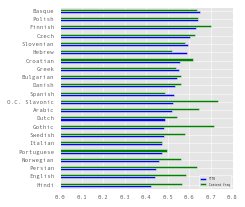

In [11]:
content_dist = pd.DataFrame.from_csv('../data/content_function_freq.csv')['Content freq']
sttr = pd.DataFrame.from_csv('../data/standard_ttr.1.2.csv')
content_sttr = pd.concat([sttr['mean'], content_dist], axis=1)
renamed = content_sttr.rename(index={'Old_Church_Slavonic': 'O.C. Slavonic'}, 
                              columns={'mean': 'STTR', 0: "Content deprel ratio"})
renamed.sort_values('STTR').plot(kind='barh', figsize=(3.5, 3), fontsize=6)
plt.legend(fontsize=3, loc=4)
plt.tight_layout()
plt.savefig('../paper/figures/standard_ttr.pdf')

## Average word dependency entropy

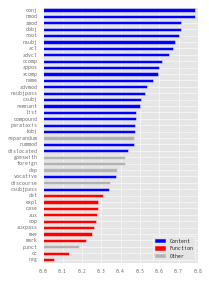

In [12]:
wde = pd.Series.from_csv('../data/function_content_degree.wde.csv')

from matplotlib.patches import Patch
colmap = {deprel: 'red' for deprel in dependency_classes.function_dependents}
colmap.update({deprel: 'blue' for deprel in dependency_classes.content_dependents})
colmap.update({deprel: (0.7, 0.7, 0.7) for deprel in dependency_classes.nonsemantic_dependents})
colors = list(map(lambda deprel: colmap[deprel], wde.sort_values(ascending=True).index))
fhandle = Patch(color='red', label='Function')
chandle = Patch(color='blue', label='Content')
ohandle = Patch(color=(0.7, 0.7, 0.7), label='Other')

ax = wde.sort_values(ascending=True).plot(kind='barh', fontsize=5, figsize=(3, 4), color=colors)
plt.legend(handles=[chandle, fhandle, ohandle], loc=4, fontsize=5)
plt.tight_layout()
plt.savefig('../paper/figures/word_dependency_entropy.pdf')


## Pearson correlation matrix

Manually boldfaced

In [77]:
sttr = pd.DataFrame.from_csv('../data/standard_ttr.1.2.csv').rename(columns={'mean': 'STTR'})['STTR']
lang_dist = pd.DataFrame.from_csv('../data/content_function_freq.csv').rename(columns={'Function freq': 'F freq', 
                                                                                       'Content freq': 'C freq'})
lang_measures = pd.DataFrame.from_csv('../data/maltdefault.lang_measures.csv').rename(columns={'Averaged WLAS': 'Avg WLAS'})
lang_measures = pd.concat([lang_measures, lang_dist], axis=1)
corrs = lang_measures.corr('pearson')
corrs = pd.DataFrame(np.triu(corrs, k=1), index=corrs.index, columns=corrs.columns).replace(0, "")
corrs = corrs.drop('WLAS', axis=1).drop('F freq', axis=0)
with open('../paper/tables/res_corrs.latex', 'w') as w:
    corrs.to_latex(buf=w, column_format="lrrrrrrrrr", float_format=lambda x: "{:.2f}".format(x))
corrs

,LAS,C prec,C rec,F prec,F rec,C freq,F freq
WLAS,0.986439,0.958025,0.977523,0.808511,0.850822,-0.496427,0.418081
LAS,,0.956086,0.961225,0.833562,0.889671,-0.480632,0.431883
C prec,,,0.985554,0.662361,0.748413,-0.254856,0.185591
C rec,,,,0.709218,0.758649,-0.331597,0.233178
F prec,,,,,0.966026,-0.727561,0.666145
F rec,,,,,,-0.66533,0.623118
C freq,,,,,,,-0.858977


## Maltdefault results

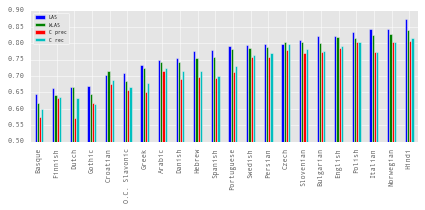

In [76]:
lang_measures = pd.DataFrame.from_csv('../data/maltdefault.lang_measures.csv')[['LAS', 'WLAS', 'C prec', 'C rec']]
lang_measures.rename(columns={0: 'LAS', 1: 'WLAS'}, inplace=True)
lang_measures.sort_values('LAS', inplace=True)
renamed = lang_measures.rename(index={'Old_Church_Slavonic': 'O.C. Slavonic'})
ax = renamed.plot(kind='bar', figsize=(6,3), fontsize=7, legend=False)
ax.legend(loc=2, fontsize=5)
plt.ylim(0.5, 0.9)
plt.tight_layout()
plt.savefig('../paper/figures/content_las_comparison.pdf')

## Cumulative variance

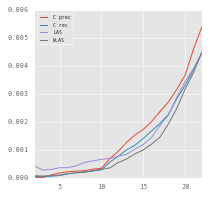

In [74]:
lang_measures = pd.DataFrame.from_csv('../data/maltdefault.lang_measures.csv')
vals = ["C prec", "C rec", "WLAS", "LAS"]
vars = {"C prec": [], "C rec": [], "LAS": [], "WLAS": []}
for val in vals:
    for i in range(2, len(lang_measures)+1):
        vars[val].append(lang_measures.sort_values(val, ascending=False)[val].ix[:i].var())

vars = pd.DataFrame(vars)
vars.index = range(2,len(lang_measures)+1)
vars.plot(figsize=(3,3), legend=False, fontsize=7)
plt.legend(fontsize=5, loc=2)
plt.savefig('../paper/figures/cumul_vars.pdf')

## Human judgment scores

In [22]:
hujudg = pd.DataFrame.from_csv('../data/human_judgment_corr.csv')
# manual changes to file, so just making sure i don't run this by mistake
#with open('../paper/tables/human_judgment.latex', 'w') as w:
#    hujudg.to_latex(buf=w, column_format="lrrrr", float_format=lambda x: "{:.2f}".format(x))
hujudg

,Content precision,Content recall,LAS,WLAS
English,0.508442,0.581423,0.545157,0.546863
German,0.371537,0.437564,0.463736,0.463736
Spanish,0.448713,0.463425,0.490216,0.478960
